<a href="https://colab.research.google.com/github/Gk1694/Natural-language-processing/blob/main/Social_Media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git

In [40]:
API_TOKEN = "<your Hugging Face token>"

Scraping Tweeter data using snscraper


In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Creating list to append tweet data to
attributes_container = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('karnataka election since:2023-04-05 until:2023-05-06').get_items()):
    if i>1500:
        break
    attributes_container.append([tweet.user.username, tweet.date, tweet.likeCount, tweet.media, tweet.content, tweet.replyCount, tweet.retweetCount, tweet.lang, tweet.viewCount,tweet.place])
    
# Creating a dataframe to load the list
tweets_df = pd.DataFrame(attributes_container, columns=["User", "Date Created", "Number of Likes", "media", "Tweet", "Reply Count","Retweet Count","lang","veiw","Place"])

gather the data related the modi in tweet

In [42]:
tweets = tweets_df[tweets_df['lang'] == 'en']

In [43]:
train = tweets[['User','Tweet','Number of Likes','Reply Count','Retweet Count','veiw']]

In [ ]:
train.dropna(inplace=True)

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8354 entries, 1 to 15000
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User             8354 non-null   object 
 1   Tweet            8354 non-null   object 
 2   Number of Likes  8354 non-null   int64  
 3   Reply Count      8354 non-null   int64  
 4   Retweet Count    8354 non-null   int64  
 5   veiw             8354 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 456.9+ KB


In [52]:
train['Tweet'][2]

'@nviswam @Swamy39 @chitrapadhi @RajeshTamret @Bhaskarg77G @MrRao_RB Many times I have said , modi is a seasoned politician'

In [ ]:
indexs = [i for i in range(train.shape[0])]
train['Index'] = indexs
train = train.set_index('Index')
train.index

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8354 entries, 0 to 8353
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User             8354 non-null   object 
 1   Tweet            8354 non-null   object 
 2   Number of Likes  8354 non-null   int64  
 3   Reply Count      8354 non-null   int64  
 4   Retweet Count    8354 non-null   int64  
 5   veiw             8354 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 456.9+ KB


In [41]:
import requests
import time

API_URL = "https://api-inference.huggingface.co/models/cardiffnlp/twitter-roberta-base-sentiment-latest"
headers = {"Authorization": f"Bearer {API_TOKEN}"}

def analysis(data):
    payload = dict(inputs=data, options=dict(wait_for_model=True))
    response = requests.post(API_URL, headers=headers, json=payload)
    return response.json()

# Let's run the sentiment analysis on each tweet
exxx = 0
tweets_analysis = []
for tweet in train['Tweet']:
    try:
        sentiment_result = analysis(tweet)[0]
        top_sentiment = max(sentiment_result, key=lambda x: x['score']) # Get the sentiment with the higher score     
        tweets_analysis.append({'tweet': tweet, 'sentiment': top_sentiment['label']})

    except Exception as e: 
      exxx += 1

In [47]:
print(len(tweets_analysis))

300


In [48]:
df = pd.DataFrame(tweets_analysis)
df.tail()

,tweet,sentiment
295,@ledygarga @anuragteddy Modi was right wing he...,neutral
296,@republic @rahmantauseef19 It seems there are ...,neutral
297,@1vincibl3 Modi's Father https://t.co/1Tbb3XoGC1,neutral
298,@sky_phd @ramkhelawan0033 It's more easily und...,positive
299,@Champaka_Aranya @sandhyaravishan @NCWIndia @s...,neutral


In [49]:
df['tweet'][4]

'@MahadevanAnanya Good morning Ananya 🌄☕☕😊💖'

sentiment
negative    124
neutral     127
positive     49
dtype: int64


<Axes: >

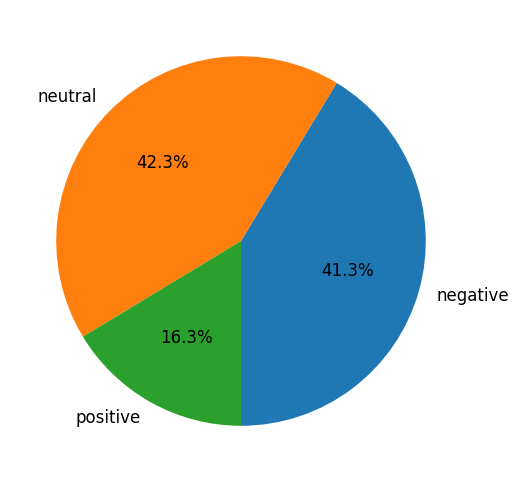

In [50]:
import matplotlib.pyplot as plt

# Let's count the number of tweets by sentiments
sentiment_counts = df.groupby(['sentiment']).size()
print(sentiment_counts)

# Let's visualize the sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

created the data of karnataka election tweet from 5 feb to 6 may

Selected the english data only

In [57]:
karnataka = tweets_df[tweets_df['lang'] == 'en']

In [58]:
kar_train = karnataka[['User','Tweet','Number of Likes','Reply Count','Retweet Count','veiw']]

In [ ]:
kar_train.dropna(inplace=True)

In [60]:
kar_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1498
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User             1045 non-null   object
 1   Tweet            1045 non-null   object
 2   Number of Likes  1045 non-null   int64 
 3   Reply Count      1045 non-null   int64 
 4   Retweet Count    1045 non-null   int64 
 5   veiw             1045 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 57.1+ KB


Most retweet and its veiws

In [76]:
max_retweet = kar_train['Retweet Count'].max()
max_retweet_row = kar_train[kar_train['Retweet Count'] == max_retweet]
display(max_retweet_row['Tweet'][566])
print('--------------------------------------------')
display(max_retweet_row['veiw'][566])

'The most VIRAL video of the Karnataka election campaign - 40% PayCM happily dancing with the loot of all the SCAMS!\n\n‘Janta Maaf Nahi Karegi’ https://t.co/Z2AnvFxT51'

--------------------------------------------


189775

In [ ]:
indexs = [i for i in range(kar_train.shape[0])]
kar_train['Index'] = indexs
kar_train = kar_train.set_index('Index')
kar_train.index

Sentimental analysis on each tweet

In [62]:
# Let's run the sentiment analysis on each tweet
kar_exxx = 0
for tweet in kar_train['Tweet']:
    try:
        sentiment_result = analysis(tweet)[0]
        top_sentiment = max(sentiment_result, key=lambda x: x['score']) # Get the sentiment with the higher score     
        tweets_analysis.append({'tweet': tweet, 'sentiment': top_sentiment['label']})

    except Exception as e: 
      kar_exxx += 1


In [65]:
kar_tweets_analysis = tweets_analysis[300:]
print(len(kar_tweets_analysis))

300


In [66]:
df2 = pd.DataFrame(kar_tweets_analysis)

sentiment
negative    100
neutral     171
positive     29
dtype: int64


<Axes: >

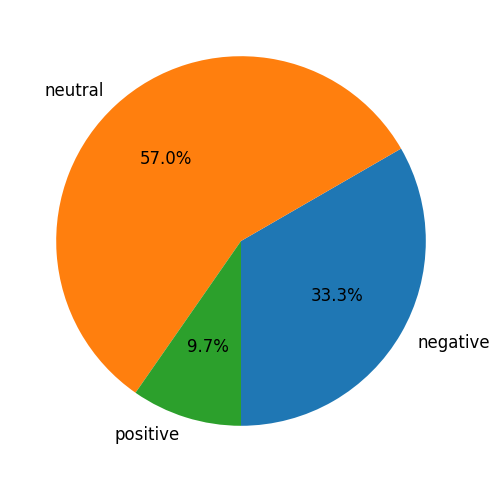

In [67]:
kar_sentiment_counts = df2.groupby(['sentiment']).size()
print(kar_sentiment_counts)

# Let's visualize the sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
kar_sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")